In [1]:
plt.rcParams['figure.figsize'] = (15,5)

In [3]:
train = pd.read_csv('benchmark7_train.csv', index_col='Date', parse_dates=True)
fill = pd.read_csv('fill_benchmark7.csv')

In [4]:
train['Fill'] = fill.xgb_fill7.values

In [5]:
train['Diff'] = train.Sales - train.Fill

In [6]:
st1 = train[train.Store==1]

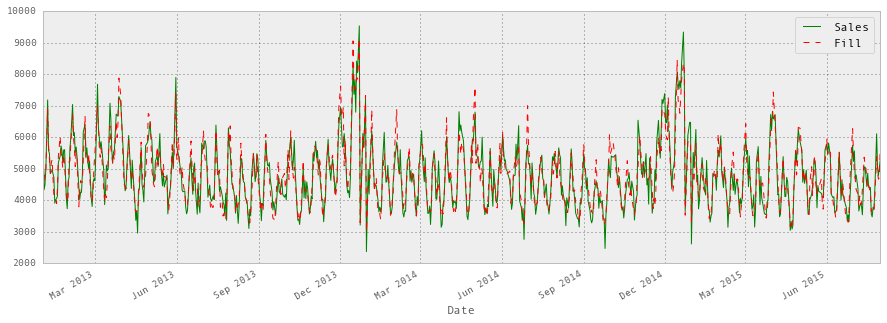

In [7]:
st1[['Sales','Fill']].plot(style={'Sales':'green','Fill':'r--'});

# Are resids "white noise"

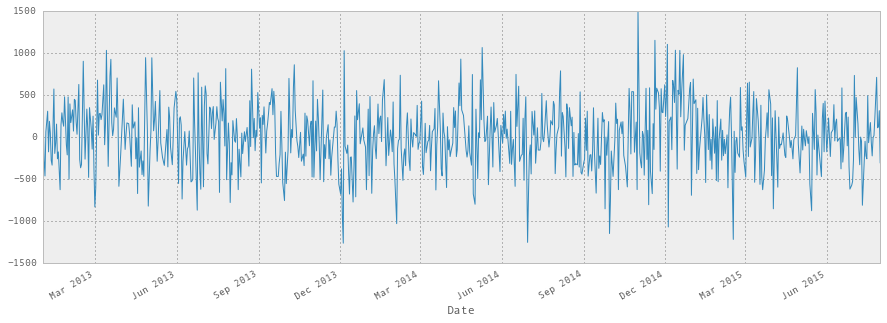

In [8]:
# rmspe: 226,763,60,622,781,85,906,974,896,924,737,61,444,569,830,808,347,125,885,531

# mean: 379,307,512,469,826,594,1013, 875,347,559,443,420,278,896,908,830,643,261,841,125

x=1
stx = train[train.Store==x]
stx.Diff.plot();

In [10]:
import statsmodels.api as sm

In [11]:
sm.stats.diagnostic.acorr_ljungbox(stx.Diff)

(array([  1.91044694,   5.12772733,   5.69207054,  11.25797792,
         11.27349237,  13.77411908,  17.36841457,  20.06498598,
         23.31943064,  24.262847  ,  24.49627531,  24.51992802,
         24.86018815,  25.12578635,  25.33178557,  27.56360829,
         30.81487726,  32.18136903,  32.18952291,  33.63288275,
         33.80596725,  35.6511072 ,  35.65392005,  35.7074625 ,
         35.9168558 ,  36.91009597,  36.9167993 ,  37.00836613,
         39.34396418,  41.80492892,  45.86342986,  45.97997753,
         47.01652608,  48.18944488,  48.22182669,  48.57351907,
         49.12686741,  49.14060878,  52.49598651,  52.66898217]),
 array([ 0.16691362,  0.07700664,  0.12759149,  0.02381269,  0.04621912,
         0.03226371,  0.01516896,  0.01009296,  0.00551741,  0.00693246,
         0.01079569,  0.01726897,  0.02407944,  0.03334572,  0.04566119,
         0.03562802,  0.02103288,  0.0209245 ,  0.0297526 ,  0.02871803,
         0.03800971,  0.03308394,  0.04473155,  0.05857762,  0.072

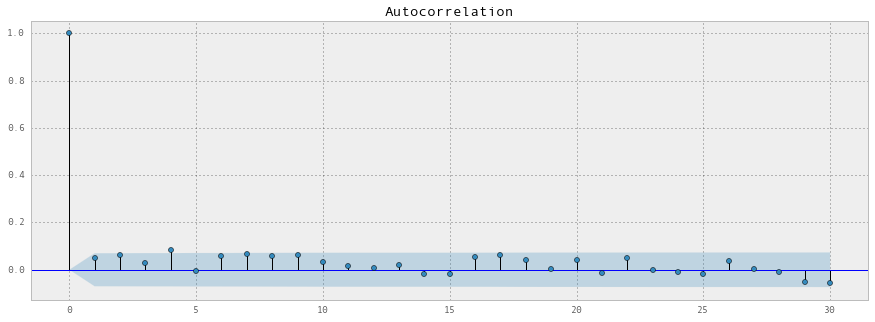

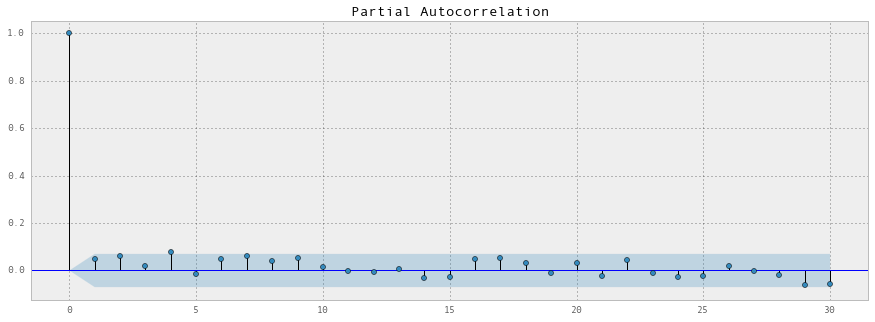

In [17]:
sm.graphics.tsa.plot_acf(stx.Diff, alpha=.05,lags=30);
sm.graphics.tsa.plot_pacf(stx.Diff, alpha=.05, lags=30);

In [11]:
st1.Diff.mean()

7.6491162352550868

Resids have non-zero mean!!!

Which store has the highest deviation from zero in resids?

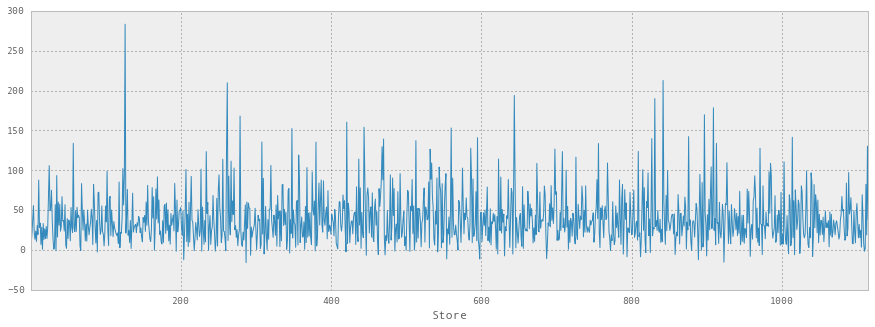

In [28]:
train.groupby('Store')['Diff'].agg('mean').plot();

In [231]:
store = train.groupby('Store')['Store'].agg('mean')

In [232]:
np.argsort(train.groupby('Store')['Diff'].agg('mean').values)[-20:]

array([ 379,  307,  512,  469,  826,  594, 1013,  875,  347,  559,  443,
        420,  278,  896,  908,  830,  643,  261,  841,  125])

In [98]:
np.argsort(train.groupby('Store')['Diff'].agg('mean').values)[-10:]

array([443, 420, 278, 896, 908, 830, 643, 261, 841, 125])

In [138]:
def rmspe(x,y):
    return np.sqrt(np.mean((x/y-1)**2))

rm = []
for store_ in np.sort(train.Store.unique()):
    z = train[train.Store==store_]
    x = z.Fill
    y = z.Sales
    rm.append(rmspe(x,y))

In [233]:
np.argsort(rm)[-20:]

array([226, 763,  60, 622, 781,  85, 906, 974, 896, 924, 737,  61, 444,
       569, 830, 808, 347, 125, 885, 531])

In [150]:
rm[531]

0.27226582096753654

In [160]:
rm[885]

0.25921327584247966

In [151]:
store.iloc[531]

532

In [176]:
train[train.Store==809].Diff.mean()

123.61645058580307

In [158]:
train[train.Store==886].Diff.mean()

58.20147035194055

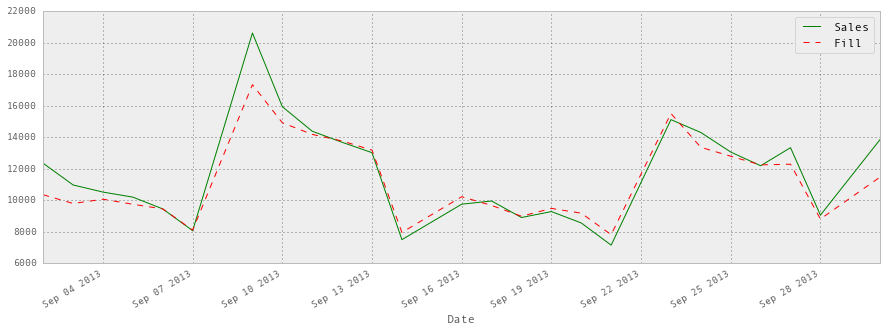

In [245]:
train.loc[(train.Store==831)&(train.Year==2013)&(train.Month==9),['Sales','Fill']].plot(style={'Sales':'green','Fill':'r--'});

In [216]:
x=809
stx = train[train.Store==x]
rmspe(stx.Fill-corr, stx.Sales)

0.22239608138509448